### Importing necessary modules

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import json
import requests
import os
import matplotlib.pyplot as plt
import cufflinks as cf
from functools import reduce
cf.set_config_file(world_readable=True,theme='pearl')
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
%matplotlib inline

#Reading the data from csv and storing the df in empty dictionary
years = [2015,2016,2017,2018,2019]
df={}
for year in years:
    url = f"../UWA-Project/Resources/{year}.csv"
    pd.set_option("display.max_rows",800)
    df[year] = pd.read_csv(url)


### Cleaning the df over the period 2016-2019

In [27]:
#Unpacking the df
df_2015,df_2016,df_2017,df_2018,df_2019 = df[2015],df[2016],df[2017],df[2018],df[2019]

In [28]:
# Checking for null values in the df
for year in years:
    print(f"""{year} \n{df[year].isna().sum()}
----------""")

2015 
Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64
----------
2016 
Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64
----------
2017 
Country                          0
Happiness.Rank          

In [29]:
# Checked for null values - replaced it with with zero.
df_2018.fillna(0,inplace = True)
df_2018.isna().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [30]:
# replacing spaces with underscore
for year in years:
    df[year].columns = [x.replace(" ","_") for x in df[year].columns.values]
    print(f"""{year} \n{df[year].columns}
----------""")


2015 
Index(['Country', 'Region', 'Happiness_Rank', 'Happiness_Score',
       'Standard_Error', 'Economy_(GDP_per_Capita)', 'Family',
       'Health_(Life_Expectancy)', 'Freedom', 'Trust_(Government_Corruption)',
       'Generosity', 'Dystopia_Residual'],
      dtype='object')
----------
2016 
Index(['Country', 'Region', 'Happiness_Rank', 'Happiness_Score',
       'Lower_Confidence_Interval', 'Upper_Confidence_Interval',
       'Economy_(GDP_per_Capita)', 'Family', 'Health_(Life_Expectancy)',
       'Freedom', 'Trust_(Government_Corruption)', 'Generosity',
       'Dystopia_Residual'],
      dtype='object')
----------
2017 
Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')
----------
2018 
Index(['Overall_rank', 'Country_or_region', 'Score', 'GDP_per_capita',
      

In [31]:
#Removing non-contributing columns of the df 
col = ['Lower_Confidence_Interval','Upper_Confidence_Interval','Region','Whisker.high','Whisker.low','Standard_Error']
for year in years:
    for value in df[year].columns:
          if value in col:
            del df[year][value]

df[2019]

,Overall_rank,Country_or_region,Score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


In [32]:
#Checking the missing columns of the df
for year in years:
    print(f"""{year} \n{df[year].shape}
----------""")

2015 
(158, 10)
----------
2016 
(157, 10)
----------
2017 
(155, 10)
----------
2018 
(156, 9)
----------
2019 
(156, 9)
----------


In [33]:
#Calculating the missing dystopian columnn values for 2018 and 2019 and Renaming the columns over that period
for year in years[-2:]:
    df[year]['Dystopia_Residual'] = df[year].loc[:,'Score']-df[year].loc[:,'GDP_per_capita':].sum(axis=1)
    df[year].rename(columns={
    'Score':'Happiness_Score',
    'GDP_per_capita':'Economy_(GDP_per_Capita)',
    'Social_support':'Family',
    'Healthy_life_expectancy':'Health_(Life_Expectancy)',
    'Freedom_to_make_life_choices':'Freedom',
    'Perceptions_of_corruption':'Trust_(Government_Corruption)',
    'Overall_rank':'Happiness_Rank',
    'Country_or_region':'Country'
 },inplace=True)
    
#Renaming 2017 df column names
df[2017].rename(columns={
    'Happiness.Score':'Happiness_Score',
    'Economy..GDP.per.Capita.':'Economy_(GDP_per_Capita)',
    'Health..Life.Expectancy.':'Health_(Life_Expectancy)',
    'Trust..Government.Corruption.':'Trust_(Government_Corruption)',
    'Happiness.Rank':'Happiness_Rank',
    'Dystopia.Residual':'Dystopia_Residual'
 },inplace=True)


In [34]:
#Showing all the columns of the df are equal size
for year in years:
    print(f"""{year} \n{df[year].shape}
----------""")

2015 
(158, 10)
----------
2016 
(157, 10)
----------
2017 
(155, 10)
----------
2018 
(156, 10)
----------
2019 
(156, 10)
----------


In [35]:
#Finding any duplicates in df
for year in years:
    print(f"""{year} \n{df[year]['Country'].nunique()}
----------""")

2015 
158
----------
2016 
157
----------
2017 
155
----------
2018 
156
----------
2019 
156
----------


In [36]:
#Checking if the right data type in data frames 
for year in years:
    print(f"""\n{year} \n{df[year].info()}
----------\n""")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Happiness_Rank                 158 non-null    int64  
 2   Happiness_Score                158 non-null    float64
 3   Economy_(GDP_per_Capita)       158 non-null    float64
 4   Family                         158 non-null    float64
 5   Health_(Life_Expectancy)       158 non-null    float64
 6   Freedom                        158 non-null    float64
 7   Trust_(Government_Corruption)  158 non-null    float64
 8   Generosity                     158 non-null    float64
 9   Dystopia_Residual              158 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 12.5+ KB

2015 
None
----------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (to

In [37]:
for year in years:
    print(f"""\n{year} \n{df[year].columns}
----------\n""")


2015 
Index(['Country', 'Happiness_Rank', 'Happiness_Score',
       'Economy_(GDP_per_Capita)', 'Family', 'Health_(Life_Expectancy)',
       'Freedom', 'Trust_(Government_Corruption)', 'Generosity',
       'Dystopia_Residual'],
      dtype='object')
----------


2016 
Index(['Country', 'Happiness_Rank', 'Happiness_Score',
       'Economy_(GDP_per_Capita)', 'Family', 'Health_(Life_Expectancy)',
       'Freedom', 'Trust_(Government_Corruption)', 'Generosity',
       'Dystopia_Residual'],
      dtype='object')
----------


2017 
Index(['Country', 'Happiness_Rank', 'Happiness_Score',
       'Economy_(GDP_per_Capita)', 'Family', 'Health_(Life_Expectancy)',
       'Freedom', 'Generosity', 'Trust_(Government_Corruption)',
       'Dystopia_Residual'],
      dtype='object')
----------


2018 
Index(['Happiness_Rank', 'Country', 'Happiness_Score',
       'Economy_(GDP_per_Capita)', 'Family', 'Health_(Life_Expectancy)',
       'Freedom', 'Generosity', 'Trust_(Government_Corruption)',
       'Dys

In [38]:
#Restructurin the column names for uniformity in df
#Writing the cleaned df into csv
for year in years:
    df[year] = df[year][['Country', 'Happiness_Rank', 'Happiness_Score',
       'Economy_(GDP_per_Capita)', 'Family', 'Health_(Life_Expectancy)',
       'Freedom', 'Trust_(Government_Corruption)', 'Generosity',
       'Dystopia_Residual']]
    df[year].to_csv(f"../UWA-Project/Output/{year}.csv",index=False)


In [54]:
for year in years:
    df[year]['year'] = [year for x in range(len(df[year].Country))]


In [108]:
df_list = [df[x] for x in range(2015,2020)]
merged_pd =  pd.concat(df_list)

merged_pd

,Country,Happiness_Rank,Happiness_Score,Economy_(GDP_per_Capita),Family,Health_(Life_Expectancy),Freedom,Trust_(Government_Corruption),Generosity,Dystopia_Residual,year
0,Switzerland,1,7.587,1.396510,1.349510,0.941430,0.665570,0.419780,0.296780,2.517380,2015
1,Iceland,2,7.561,1.302320,1.402230,0.947840,0.628770,0.141450,0.436300,2.702010,2015
2,Denmark,3,7.527,1.325480,1.360580,0.874640,0.649380,0.483570,0.341390,2.492040,2015
3,Norway,4,7.522,1.459000,1.330950,0.885210,0.669730,0.365030,0.346990,2.465310,2015
4,Canada,5,7.427,1.326290,1.322610,0.905630,0.632970,0.329570,0.458110,2.451760,2015
5,Finland,6,7.406,1.290250,1.318260,0.889110,0.641690,0.413720,0.233510,2.619550,2015
6,Netherlands,7,7.378,1.329440,1.280170,0.892840,0.615760,0.318140,0.476100,2.465700,2015
7,Sweden,8,7.364,1.331710,1.289070,0.910870,0.659800,0.438440,0.362620,2.371190,2015
8,New Zealand,9,7.286,1.250180,1.319670,0.908370,0.639380,0.429220,0.475010,2.264250,2015
9,Australia,10,7.284,1.333580,1.309230,0.931560,0.651240,0.356370,0.435620,2.266460,2015


In [89]:
merged_pd.sort_values('Happiness_Rank',inplace=True)
merged_pd.reset_index(drop=True,inplace=True)
merged_pd.head(50)

,Country,Happiness_Rank,Happiness_Score,Economy_(GDP_per_Capita),Family,Health_(Life_Expectancy),Freedom,Trust_(Government_Corruption),Generosity,Dystopia_Residual,year
0,Switzerland,1,7.587,1.396510,1.349510,0.941430,0.665570,0.419780,0.296780,2.517380,2015
1,Finland,1,7.769,1.340000,1.587000,0.986000,0.596000,0.393000,0.153000,2.714000,2019
2,Finland,1,7.632,1.305000,1.592000,0.874000,0.681000,0.393000,0.202000,2.585000,2018
3,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.315964,0.362012,2.277027,2017
4,Denmark,1,7.526,1.441780,1.163740,0.795040,0.579410,0.444530,0.361710,2.739390,2016
5,Norway,2,7.594,1.456000,1.582000,0.861000,0.686000,0.340000,0.286000,2.383000,2018
6,Switzerland,2,7.509,1.527330,1.145240,0.863030,0.585570,0.412030,0.280830,2.694630,2016
7,Iceland,2,7.561,1.302320,1.402230,0.947840,0.628770,0.141450,0.436300,2.702010,2015
8,Denmark,2,7.600,1.383000,1.573000,0.996000,0.592000,0.410000,0.252000,2.394000,2019
9,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.400770,0.355280,2.313707,2017


In [102]:
Country_rank_count = pd.DataFrame(merged_pd.groupby(['Country','Happiness_Rank']).Happiness_Rank.count())
Country_rank_count

Happiness_Rank
Country                  Happiness_Rank                
Afghanistan              141                          1
                         145                          1
                         153                          1
                         154                          2
Albania                  95                           1
                         107                          1
                         109                          2
                         112                          1
Algeria                  38                           1
                         53                           1
                         68                           1
                         84                           1
                         88                           1
Angola                   137                          1
                         140                          1
                         141                          1
                         142                          1
Argentina                24                           1
                         26                           1
                         29                           1
                         30                           1
                         47                           1
Armenia                  116                          1
                         121                          2
                         127                          1
                         129                          1
Australia                9                            1
                         10                           3
                         11                           1
Austria                  10                           1
                         12                           2
                         13                           2
Azerbaijan               80                           1
                         81                           1
                         85                           1
                         87                           1
                         90                           1
Bahrain                  37                           1
                         41                           1
                         42                           1
                         43                           1
                         49                           1
Bangladesh               109                          1
                         110                          2
                         115                          1
                         125                          1
Belarus                  59                           1
                         61                           1
                         67                           1
                         73                           1
                         81                           1
Belgium                  16                           1
                         17                           1
                         18                           2
                         19                           1
Belize                   49                           1
                         50                           1
                         52                           1
Benin                    102                          1
                         136                          1
                         143                          1
                         153                          1
                         155                          1
Bhutan                   79                           1
                         84                           1
                         95                           1
                         97                           2
Bolivia                  51                           1
                         58                           1
                         59                           1
         

In [104]:
## 
df_2016.corr()

,Happiness_Rank,Happiness_Score,Economy_(GDP_per_Capita),Family,Health_(Life_Expectancy),Freedom,Trust_(Government_Corruption),Generosity,Dystopia_Residual
Happiness_Rank,1.000000,-0.995743,-0.793577,-0.733276,-0.767991,-0.557169,-0.387102,-0.145369,-0.542616
Happiness_Score,-0.995743,1.000000,0.790322,0.739252,0.765384,0.566827,0.402032,0.156848,0.543738
Economy_(GDP_per_Capita),-0.793577,0.790322,1.000000,0.669540,0.837067,0.362283,0.294185,-0.025531,0.068624
Family,-0.733276,0.739252,0.669540,1.000000,0.588377,0.450208,0.213561,0.089629,0.119672
Health_(Life_Expectancy),-0.767991,0.765384,0.837067,0.588377,1.000000,0.341199,0.249583,0.075987,0.100857
Freedom,-0.557169,0.566827,0.362283,0.450208,0.341199,1.000000,0.502054,0.361751,0.091631
Trust_(Government_Corruption),-0.387102,0.402032,0.294185,0.213561,0.249583,0.502054,1.000000,0.305930,-0.002909
Generosity,-0.145369,0.156848,-0.025531,0.089629,0.075987,0.361751,0.305930,1.000000,-0.133001
Dystopia_Residual,-0.542616,0.543738,0.068624,0.119672,0.100857,0.091631,-0.002909,-0.133001,1.000000


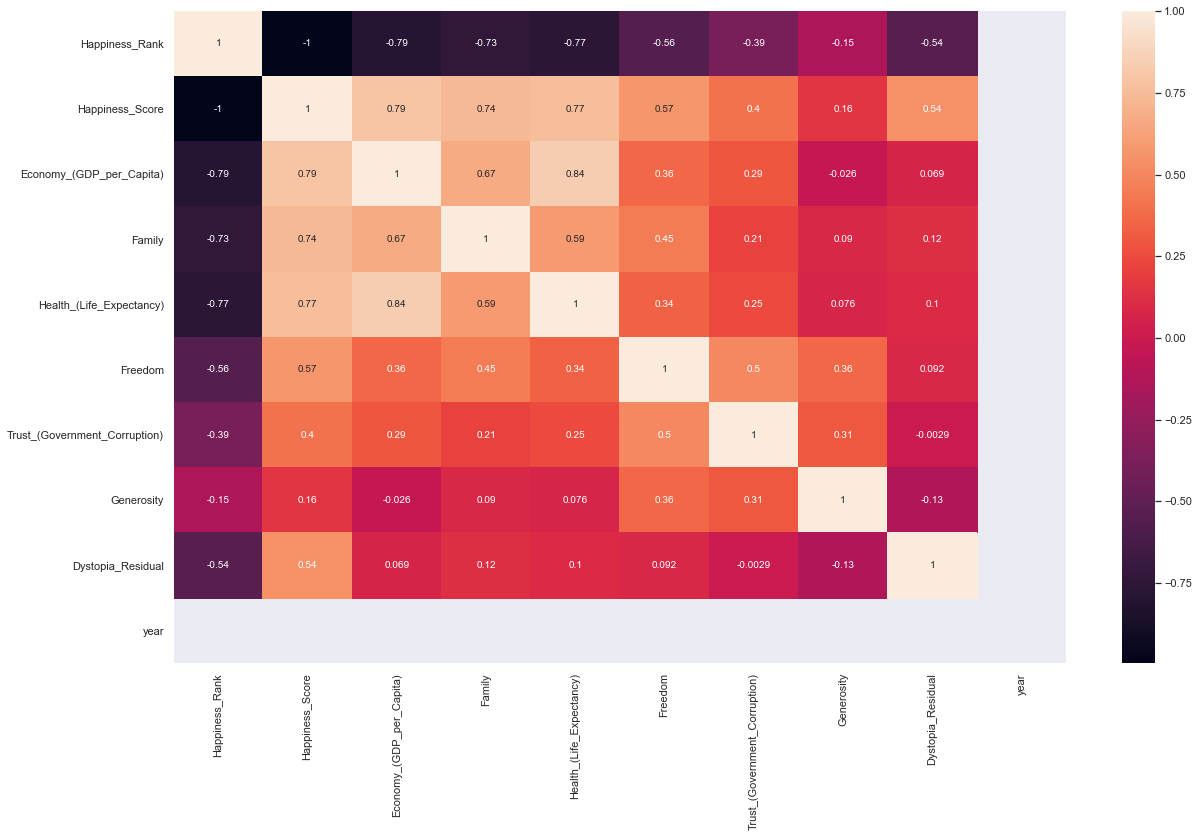

In [106]:
plt.figure(figsize=(20,12))
sns.heatmap(df[2016].corr(), annot=True)
plt.show()
